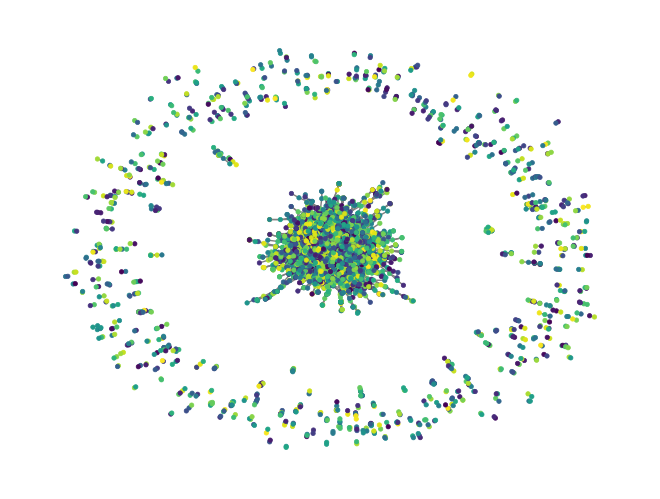

In [ ]:
###############################
# VISUALIZE GRAPH DATASET
###############################
import networkx as nx
import matplotlib.pyplot as plt
import random

# Đọc file đồ thị
G = nx.read_weighted_edgelist("ca-GrQc_adj.tsv", delimiter='\t')

# Sử dụng force-directed layout để xác định vị trí của các nút
pos = nx.fruchterman_reingold_layout(G)

# Tạo danh sách màu sắc ngẫu nhiên cho các nút
node_colors = [plt.cm.viridis(random.random()) for _ in range(len(G.nodes))]

# Vẽ đồ thị với màu sắc ngẫu nhiên
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors, edge_color='gray', linewidths=0.5)

# Lưu hình ảnh vào tệp tin PNG
plt.savefig("my_colorful_graph.png")

# Hiển thị hình ảnh
plt.show()

# Triangle Counting
Include 3 cells: \\
cell 1:
  Basic counting △ and runtime \\
cell 2:
  Analasys bargraph of the number triangles of each vertex \\
cell 3:
  vissualize the graph with node ∈ △ and node ∉ △

In [ ]:
###################################
# TRIANGLES COUNTING
###################################
from time import perf_counter
from glob import glob
import os,sys
import numpy as np
import pandas
from pandas import read_csv
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

# write triangle of each vertex into outfile
def writefile(C,outfile):
    num_rows, num_cols = C.shape
    count_vector = np.zeros(num_rows, dtype=int)  #count_vector: vertex vector
    with open(outfile, "w") as f:
        for vertex in range(num_rows):
          count_vector[vertex] = (C.getrow(vertex).data == 2).sum() #count triangle each vertex
          f.write(str(vertex+1) + '\t' + str(count_vector[vertex]) + '\n')
###################################################################################################
def triangle(adj_mtx_file, inc_mtx_file):

    # figure out the shape of the adjacency matrix
    a = read_csv(adj_mtx_file, sep='\s+', header=None, skiprows=2, nrows=1, dtype=float).to_numpy()
    M = int(a[0, 0])
    N = int(a[0, 1])

    # read adjacency matrix
    y = read_csv(adj_mtx_file, sep='\s+', header=None, skiprows=3, dtype=float).to_numpy()


    # convert data to sparse matrix using the coo_matrix function

    A = coo_matrix((y[:, 2], (y[:, 0] - 1, y[:, 1] - 1)), shape=(M, N))

    A = A + A.transpose() #generate symmetric matrix
    adjMtx = A.tocsr() #convert to matrix csr mattrix

    # figure out shape of incidence matrix
    a = read_csv(inc_mtx_file, sep='\s+', header=None, skiprows=2, nrows=1, dtype=float).to_numpy()
    M = int(a[0, 0])
    N = int(a[0, 1])

    # read incidence matrix
    y = read_csv(inc_mtx_file, sep='\s+', header=None, skiprows=3, dtype=float).to_numpy()

    # reshape incidence matrix
    B = coo_matrix((y[:, 2], (y[:, 0] - 1, y[:, 1] - 1)), shape=(M, N))
    incMtx = B.tocsr()

    #time start counting
    t0 = perf_counter()
    C = adjMtx @ incMtx
    # count triangles
    num_triangles = (C.data == 2).sum() // 3
    t_triangle_count = perf_counter() - t0

    #count triangles of each vertex and write to file
    writefile(C,"Vertex_triangles.tsv")

    return (num_triangles, t_triangle_count)
###################################################################################
#                   MAIN FUNCTION
inc_mtx_file = "ca-GrQc_inc.mmio"
adj_mtx_file = "ca-GrQc_adj.mmio"
if not os.path.isfile(inc_mtx_file):
	print("File doesn't exist: '{}'!".format(inc_mtx_file))
	sys.exit(1)
elif not os.path.isfile(adj_mtx_file):
	print("File doesn't exist: '{}'!".format(adj_mtx_file))
	sys.exit(1)

# this depends on the pandas package
result=triangle(adj_mtx_file, inc_mtx_file)
print("Number of triangles: "+ str(result[0]) + '\n' + "Time run: " + str(result[1])+'s')



Number of triangles: 48260
Time run: 0.011311292999835132s


Max:
  vertex  triangle_counts
   2475             1179


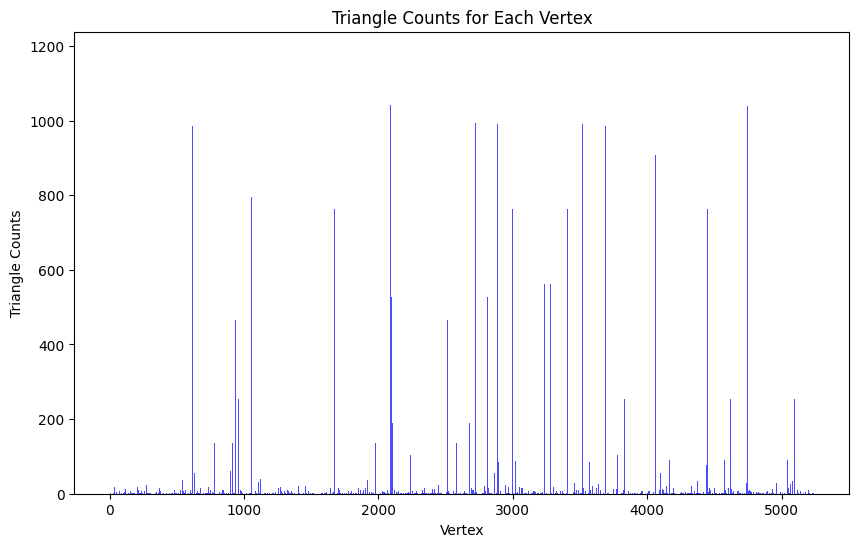

1179


In [ ]:
#######################################
# BARCHART FOR TRIANGLE OF EACH VERTEX
#######################################
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
filename = "Vertex_triangles.tsv"
data = pd.read_csv(filename, delim_whitespace=True, skiprows=0, header=None, names=['vertex', 'triangle_counts'])
max_triangles_vertex = data[data['triangle_counts'] == data['triangle_counts'].max()]
print("Max:\n", max_triangles_vertex.to_string(index=False))

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(data['vertex'], data['triangle_counts'], color='blue', alpha=0.7)

# Đặt tiêu đề và nhãn cho đồ thị
plt.title('Triangle Counts for Each Vertex')
plt.xlabel('Vertex')
plt.ylabel('Triangle Counts')

# Hiển thị đồ thị
plt.show()
print(max(data['triangle_counts']))

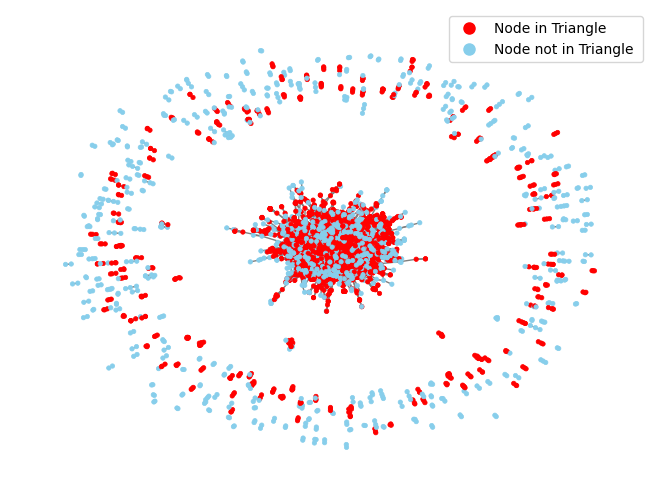

In [ ]:
#######################################
# VISUALIZE GRAPH DATASET WITH TRIANGLES
#######################################
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Đọc file đồ thị
G = nx.read_weighted_edgelist("ca-GrQc_adj.tsv", delimiter='\t')

# Đọc dữ liệu về tam giác từ DataFrame
data = pd.read_csv('Vertex_triangles.tsv', delim_whitespace=True, skiprows=0, header=None, names=['vertex', 'triangle_counts'])
# Tạo DataFrame mới dựa trên điều kiện 'triangle_counts' > 0
filtered_data = data[data['triangle_counts'] > 0]

# Tạo danh sách nút màu sắc
node_colors = ['red' if str(node) in set(filtered_data['vertex'].astype(str)) else 'skyblue' for node in G.nodes]

# Sử dụng force-directed layout để xác định vị trí của các nút
pos = nx.fruchterman_reingold_layout(G)

# Vẽ đồ thị với màu sắc dựa trên tam giác và 'triangle_counts'
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors, edge_color='gray', linewidths=0.5)

# Tạo chú thích (legend)
legend_labels = {'Node in Triangle ': 'red', 'Node not in Triangle ': 'skyblue'}
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=8, linestyle='None') for label, color in legend_labels.items()]

plt.legend(handles=legend_handles)


# Hiển thị hình ảnh
plt.show()





# Finding Maximal Ktruss
Include 4 cells: \\
Cell 1: Timerun for 10 times with k: 3 →20 and analasys the linegraph \\
Cell 2: Write the ktruss into outfile with k: 3→20 \\
Cell 3: The vissualize graph of 20truss. \\
Cell 4: Review The characterics of ktruss through the number of Nodes and Edges over each k \\


Time to Read Data:  0.004568779999999606s


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
<ipython-input-3-4581c96c01fe>:120: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  K=ktruss(E, k_value)


Median Runtime for k=3: 0.09451022299992928 seconds
Median Runtime for k=4: 0.10805185200001688 seconds
Median Runtime for k=5: 0.11143997300007413 seconds
Median Runtime for k=6: 0.11729448450000746 seconds
Median Runtime for k=7: 0.11243995199993151 seconds
Median Runtime for k=8: 0.12668725549997362 seconds
Median Runtime for k=9: 0.13240163599994048 seconds
Median Runtime for k=10: 0.10889961800000947 seconds
Median Runtime for k=11: 0.09609186399984537 seconds
Median Runtime for k=12: 0.13318492249993596 seconds
Median Runtime for k=13: 0.12049745499996334 seconds
Median Runtime for k=14: 0.12012108199996874 seconds
Median Runtime for k=15: 0.132740670999965 seconds
Median Runtime for k=16: 0.11814129850006339 seconds
Median Runtime for k=17: 0.11555354100005388 seconds
Median Runtime for k=18: 0.10252410399994005 seconds
Median Runtime for k=19: 0.09200533850003012 seconds
Median Runtime for k=20: 0.13011237099988193 seconds


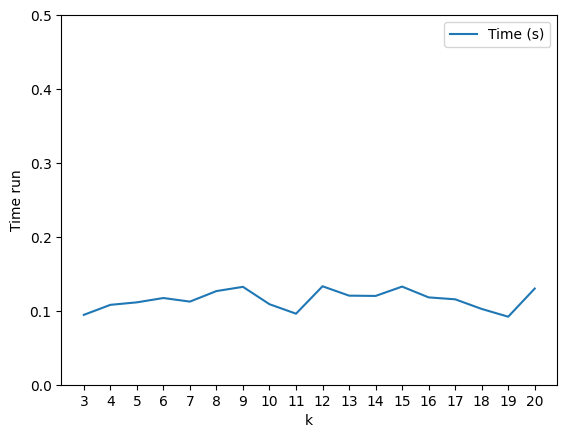

In [ ]:
#####################################
#     KTRUSS
#####################################
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.sparse import coo_matrix
from scipy.sparse import lil_matrix
import time
import os, sys, argparse
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

###################################################
###################################################
def StrArrayRead(filename):

    f=open(filename,'r')
    edgelist = []
    with open(filename, 'r') as f:
        for line in f:
            edgelist.append(list(map(float, line.split('\t'))))
    f.close()
    return np.asarray(edgelist)


###################################################
###################################################
def set_zero_rows(sparray, rowNum):
    for row in rowNum:
        sparray.data[sparray.indptr[row]:sparray.indptr[row+1]]=0

###################################################
###################################################
def set_diag_val(sparray,val):
    r,c=sparray.shape
    for row in range(r):
        sparray[row,row]=val


###################################################
###################################################
def StrArrayWrite(nparray, filename):
    with open(filename, "w") as f:
        # Duyệt qua từng dòng của nparray (giả sử nparray là một csr_matrix)
        for row in range(nparray.shape[0]):
            # Lấy chỉ số bắt đầu và kết thúc của dòng hiện tại trong indptr
            start_idx = nparray.indptr[row]
            end_idx = nparray.indptr[row + 1]

            # Lặp qua từng chỉ số cột và giá trị tương ứng trong dòng
            for idx in range(start_idx, end_idx):
                col = nparray.indices[idx]
                value = nparray.data[idx]

                # Ghi vào file với định dạng "vertex edge value"
                f.write(str(col+1)+'\t'+ str(row + 1) +'\t'+str(int(value))+'\n')


##################################################
##################################################

def ktruss (E,k):

    tmp=np.transpose(E)*E
    sizeX,sizeY=np.shape(tmp)


    tmp.setdiag(np.zeros(sizeX),k=0) #A=transpose(E)*E - diag(d)
    #set_diag_val(tmp,0)
    tmp.eliminate_zeros() #decrease memmory usage by remove zero entries from the parse matrix
    R= E * tmp

    s=lil_matrix(((R==2).astype(float)).sum(axis=1)) #axis=1 convert 2D to 1D: count of each row of R
    xc= (s >=k-2).astype(int)

    while xc.sum() != np.unique(sp.sparse.find(E)[0]).shape:
        x=sp.sparse.find(xc==0)[0]
        #x=np.where(xc==0)[0]
        set_zero_rows(E, x)
        E=(E>0).astype(int)
        #E.eliminate_zeros()
        tmp=np.transpose(E)*E
        (tmp).setdiag(np.zeros(np.shape(tmp)[0]),k=0)
        tmp.eliminate_zeros()
        R=E*tmp
        s=csr_matrix(((R==2).astype(float)).sum(axis=1))
        xc= (s >=k-2).astype(int)

    return E
#####################################################################
#############    MAIN  ##############################################
inc_mtx_file = "ca-GrQc_inc.tsv"
output = "Output_Ktruss"
if not os.path.isfile(inc_mtx_file):
	print("File doesn't exist: '{}'!".format(inc_mtx_file))
	sys.exit(1)
ii=StrArrayRead(inc_mtx_file)
startTime=time.perf_counter()
#fix: ma trận trong dữ liệu có cột ii[0] là đỉnh và ii[1] là cạnh. Chuyển sang E là |E|x|v|
E=csr_matrix(( ii[:,2], (ii[:,1]-1, ii[:,0]-1)), shape=(int(max(ii[:,1])),int(max(ii[:,0]))))
readTime=time.perf_counter()
print ("Time to Read Data:  " + str(readTime-startTime) + "s")
# Số lần chạy
num_runs = 10

# Số giá trị k
num_ks = 18  # (20 - 3 + 1)

# Mảng lưu trữ thời gian chạy
runtimes = np.zeros((num_ks, num_runs))

####################################################

for run_index in range(num_runs): # 10 timeruns
    for k_index, k_value in enumerate(range(3, 21)): # k = 3->20
        start_time = time.perf_counter()
        K=ktruss(E, k_value)
        ktruss_time = time.perf_counter()
        runtime = ktruss_time - start_time
        runtimes[k_index, run_index] = runtime #tính thời gian mỗi lần chạy

# Tính trung vị của mỗi hàng
median_runtimes_per_k = np.median(runtimes, axis=1)

# In kết quả
for k_value, median_runtime in zip(range(3, 21), median_runtimes_per_k):
    print(f"Median Runtime for k={k_value}: {median_runtime} seconds")
 #Vẽ biểu đồ thời gian chạy  theo giá trị k
plt.plot(range(3, 21), median_runtimes_per_k, label='Time (s)')
plt.xlabel('k')
plt.ylabel('Time run')

plt.xticks(range(3, 21))
plt.yticks([i/10 for i in range(6)])
plt.legend()
plt.show()


In [ ]:
###################################
# WRITE KTRUSS OUTPUT
###################################
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.sparse import coo_matrix
from scipy.sparse import lil_matrix
import copy
import os, sys, argparse
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

###################################################
###################################################
def StrArrayRead(filename):

    f=open(filename,'r')
    edgelist = []
    with open(filename, 'r') as f:
        for line in f:
            edgelist.append(list(map(float, line.split('\t'))))
    f.close()
    return np.asarray(edgelist)


###################################################
###################################################
def set_zero_rows(sparray, rowNum):
    for row in rowNum:
        sparray.data[sparray.indptr[row]:sparray.indptr[row+1]]=0

###################################################
###################################################
def set_diag_val(sparray,val):
    r,c=sparray.shape
    for row in range(r):
        sparray[row,row]=val


###################################################
###################################################
def StrArrayWrite(nparray, filename):
    with open(filename, "w") as f:
        # Duyệt qua từng dòng của nparray (giả sử nparray là một csr_matrix)
        for row in range(nparray.shape[0]):
            # Lấy chỉ số bắt đầu và kết thúc của dòng hiện tại trong indptr
            start_idx = nparray.indptr[row]
            end_idx = nparray.indptr[row + 1]

            # Lặp qua từng chỉ số cột và giá trị tương ứng trong dòng
            for idx in range(start_idx, end_idx):
                col = nparray.indices[idx]
                value = nparray.data[idx]

                # Ghi vào file với định dạng "vertex edge value"
                f.write(str(col+1)+'\t'+ str(row + 1) +'\t'+str(int(value))+'\n')



def ktruss (E,k):

    tmp=np.transpose(E)*E
    sizeX,sizeY=np.shape(tmp)


    tmp.setdiag(np.zeros(sizeX),k=0) #A=transpose(E)*E - diag(d)
    tmp.eliminate_zeros() #decrease memmory usage by remove zero entries from the parse matrix
    R= E * tmp

    s=lil_matrix(((R==2).astype(float)).sum(axis=1)) #axis=1 convert 2D to 1D: count of each row of R
    xc= (s >=k-2).astype(int)

    while xc.sum() != np.unique(sp.sparse.find(E)[0]).shape:
        x=sp.sparse.find(xc==0)[0]
        #x=np.where(xc==0)[0]
        set_zero_rows(E, x)
        E=(E>0).astype(int)
        #E.eliminate_zeros()
        tmp=np.transpose(E)*E
        (tmp).setdiag(np.zeros(np.shape(tmp)[0]),k=0)
        tmp.eliminate_zeros()
        R=E*tmp
        s=csr_matrix(((R==2).astype(float)).sum(axis=1))
        xc= (s >=k-2).astype(int)
    return E

inc_mtx_file = "ca-GrQc_inc.tsv"

if not os.path.isfile(inc_mtx_file):
	print("File doesn't exist: '{}'!".format(inc_mtx_file))
	sys.exit(1)
ii=StrArrayRead(inc_mtx_file)

#fix: ma trận trong dữ liệu có cột ii[0] là đỉnh và ii[1] là cạnh. Chuyển sang E là |E|x|v|
E=csr_matrix(( ii[:,2], (ii[:,1]-1, ii[:,0]-1)), shape=(int(max(ii[:,1])),int(max(ii[:,0]))))
for i in range(3,21):
  E_copy = copy.deepcopy(E)
  print(f'writting into file: ktruss_result_k{i}.tsv ')
  output_file=f'ktruss_result_k{i}.tsv'
  A=ktruss(E_copy,i)
  StrArrayWrite(A,output_file)
print("Done")







writting into file: ktruss_result_k3.tsv 


<ipython-input-4-818fa3bc52c2>:103: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  A=ktruss(E_copy,i)


writting into file: ktruss_result_k4.tsv 
writting into file: ktruss_result_k5.tsv 
writting into file: ktruss_result_k6.tsv 
writting into file: ktruss_result_k7.tsv 
writting into file: ktruss_result_k8.tsv 
writting into file: ktruss_result_k9.tsv 
writting into file: ktruss_result_k10.tsv 
writting into file: ktruss_result_k11.tsv 
writting into file: ktruss_result_k12.tsv 
writting into file: ktruss_result_k13.tsv 
writting into file: ktruss_result_k14.tsv 
writting into file: ktruss_result_k15.tsv 
writting into file: ktruss_result_k16.tsv 
writting into file: ktruss_result_k17.tsv 
writting into file: ktruss_result_k18.tsv 
writting into file: ktruss_result_k19.tsv 
writting into file: ktruss_result_k20.tsv 
Done


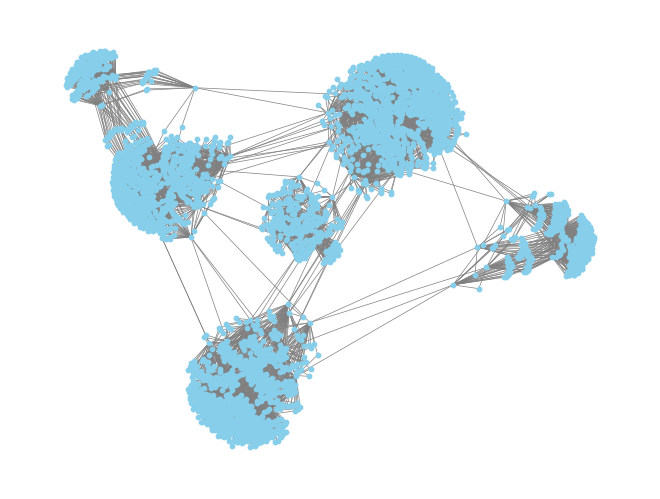

In [ ]:
####################################
# VISSUALIZE KTRUSS OUTPUT SUBGRAPH
####################################
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file TSV
file_path = 'ktruss_result_k20.tsv'
df = pd.read_csv(file_path, sep='\t', header=None, names=['vertex', 'edge', 'value'])

# Tạo đồ thị
G = nx.from_pandas_edgelist(df, 'vertex', 'edge')

# Vẽ đồ thị
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', width=0.5)
# Hiển thị đồ thị
plt.show()



     k  node_counts  edge_counts
0    3         3855        12878
1    4         2369         9756
2    5         1238         7012
3    6          718         5628
4    7          546         5083
5    8          443         4728
6    9          390         4496
7   10          346         4267
8   11          321         4137
9   12          316         4097
10  13          278         3861
11  14          273         3807
12  15          259         3716
13  16          244         3611
14  17          228         3491
15  18          228         3491
16  19          193         3185
17  20          193         3185


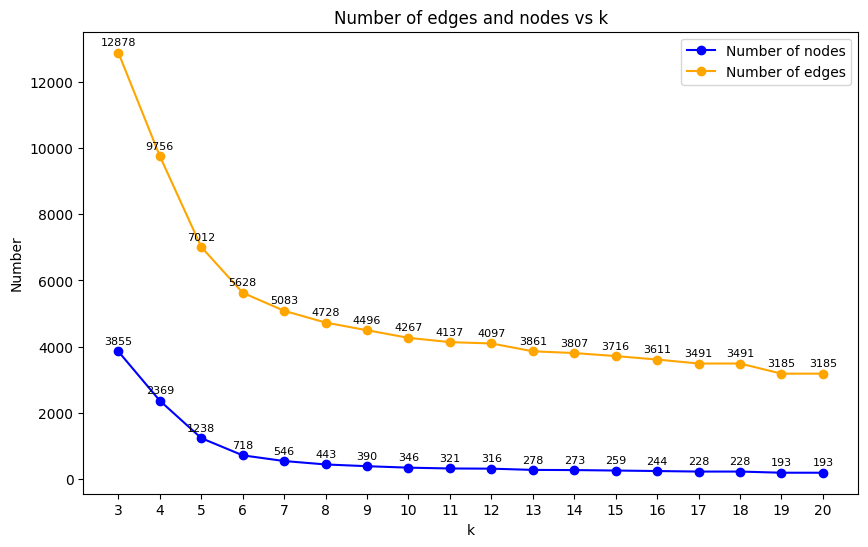

In [ ]:
###########################################################################
# CAL VERTICES EDGES PER K AND DRaW LINEGRAPH FOR KTRUSS (Node and Edge)
###########################################################################
import pandas as pd
import matplotlib.pyplot as plt
# Khởi tạo DataFrame để lưu trữ dữ liệu
data_dict = {'k': [], 'node_counts': [], 'edge_counts': []}
for i in range(3,21):
  file_path = f'ktruss_result_k{i}.tsv'

  # Sử dụng set để theo dõi các đỉnh duy nhất
  unique_vertices = set()
  unique_edges = set()
  # Mở tệp và đọc từng dòng
  with open(file_path, 'r') as file:
      for line in file:
          # Tách dữ liệu từ mỗi dòng
          vertex, edge, value = map(int, line.strip().split('\t'))

          # Thêm các đỉnh vào tập hợp
          unique_vertices.add(vertex)
          unique_edges.add(edge)

    # Đếm số lượng đỉnh duy nhất
  unique_vertices_count = len(unique_vertices)
  unique_edges_count = len(unique_edges)
    # Lưu thông tin vào DataFrame
  data_dict['k'].append(i)
  data_dict['node_counts'].append(unique_vertices_count)
  data_dict['edge_counts'].append(unique_edges_count)
# Tạo DataFrame từ dữ liệu
data = pd.DataFrame(data_dict)
print(data)
# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(data['k'], data['node_counts'], marker='o', label='Number of nodes', color='blue')
plt.plot(data['k'], data['edge_counts'], marker='o', label='Number of edges', color='orange')
# Hiển thị chú thích
for k, edge_counts, node_counts in zip(data['k'], data['edge_counts'], data['node_counts']):
    plt.annotate(f'{edge_counts}', (k, edge_counts), textcoords="offset points", xytext=(0, 5), ha='center',
                 fontsize=8)
    plt.annotate(f'{node_counts}', (k, node_counts), textcoords="offset points", xytext=(0, 5), ha='center',
                 fontsize=8)

# Đặt tiêu đề và nhãn cho đồ thị
plt.title('Number of edges and nodes vs k')
plt.xlabel('k')
plt.ylabel('Number')
plt.xticks(range(int(data['k'].min()), int(data['k'].max()) + 1))

# Hiển thị đồ thị
plt.legend()
plt.show()

